# Python and  MetaTrader5 Connection

References:

- MetaTrader module for integration with Python : https://www.mql5.com/en/docs/integration/python_metatrader5
- ATJ Traders - Algo Trading (YouTube Channel)



In [ ]:
# Importing

import MetaTrader5 as mt5  
import pandas as pd  
import plotly.express as px  
from datetime import datetime

In [ ]:
# establish MetaTrader 5 connection to my demo trading account as follows:

if not mt5.initialize(login=89450103, server="MetaQuotes-Demo",password="Mg!zAwR2"):
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# display data on connection status, server name and trading account
print(mt5.terminal_info())
# display data on MetaTrader 5 version
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4885, maxbars=100000, codepage=0, ping_last=119803, community_balance=0.0, retransmission=0.0, company='MetaQuotes Ltd.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\DELL\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\DELL\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 4885, '28 Feb 2025')


In [ ]:
# mt5.initialize(
#   path="C:\Program Files\MetaTrader 5\terminal64.exe",          # path to the MetaTrader 5 terminal EXE file
#   login=89450103,              # account number
#   password="Mg!zAwR2",         # password
#   server="MetaQuotes-Demo",     # server name as it is specified in the terminal
#   timeout=60000,                # timeout
#   portable=False               # portable mode
# )

In [6]:
# get account info
account_info = mt5.account_info()
print(account_info)

# getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

print()
print('login: ', login_number)
print('balance: ', balance)
print('equity: ', equity)

AccountInfo(login=89450103, trade_mode=0, leverage=500, limit_orders=200, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=10000.0, credit=0.0, profit=0.1, equity=10000.1, margin=2.16, margin_free=9997.94, margin_level=462967.5925925926, margin_so_call=50.0, margin_so_so=30.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Louay Alhomsi', server='MetaQuotes-Demo', currency='USD', company='MetaQuotes Ltd.')

login:  89450103
balance:  10000.0
equity:  10000.1


In [7]:
# get number of symbols with symbols_total()
num_symbols = mt5.symbols_total()

num_symbols

10561

In [8]:
# get all symbols and their specifications
symbols = mt5.symbols_get()
symbols

(SymbolInfo(custom=False, chart_mode=0, select=True, visible=True, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=1742925937, digits=5, spread=29, spread_float=True, ticks_bookdepth=32, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=1, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=7, filling_mode=1, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.902, bidhigh=0.90321, bidlow=0.89923, ask=0.90229, askhigh=0.9035, asklow=0.89955, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1e-05, trade_tick_value=0.6989438957734863, trade_tick_value_profit=0.6989438957734863, trade_tick_value_loss=0.6990660477601924, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0,

In [9]:
# get symbol specifications
symbol_info = mt5.symbol_info("EURUSD")._asdict()
symbol_info

{'custom': False,
 'chart_mode': 0,
 'select': True,
 'visible': True,
 'session_deals': 0,
 'session_buy_orders': 0,
 'session_sell_orders': 0,
 'volume': 0,
 'volumehigh': 0,
 'volumelow': 0,
 'time': 1742925948,
 'digits': 5,
 'spread': 13,
 'spread_float': True,
 'ticks_bookdepth': 32,
 'trade_calc_mode': 0,
 'trade_mode': 4,
 'start_time': 0,
 'expiration_time': 0,
 'trade_stops_level': 0,
 'trade_freeze_level': 0,
 'trade_exemode': 1,
 'swap_mode': 1,
 'swap_rollover3days': 3,
 'margin_hedged_use_leg': False,
 'expiration_mode': 15,
 'filling_mode': 1,
 'order_mode': 127,
 'order_gtc_mode': 0,
 'option_mode': 0,
 'option_right': 0,
 'bid': 1.0804,
 'bidhigh': 1.08295,
 'bidlow': 1.07765,
 'ask': 1.08053,
 'askhigh': 1.08308,
 'asklow': 1.0777700000000001,
 'last': 0.0,
 'lasthigh': 0.0,
 'lastlow': 0.0,
 'volume_real': 0.0,
 'volumehigh_real': 0.0,
 'volumelow_real': 0.0,
 'option_strike': 0.0,
 'point': 1e-05,
 'trade_tick_value': 1.0,
 'trade_tick_value_profit': 1.0,
 'trade_ti

In [10]:
# get current symbol price
symbol_price = mt5.symbol_info_tick("EURUSD")._asdict()
symbol_price

{'time': 1742925956,
 'bid': 1.08038,
 'ask': 1.08051,
 'last': 0.0,
 'volume': 0,
 'time_msc': 1742925956635,
 'flags': 1030,
 'volume_real': 0.0}

In [11]:
# ohlc_data
ohlc_data = pd.DataFrame(mt5.copy_rates_range("EURUSD", 
                                             mt5.TIMEFRAME_D1, 
                                             datetime(2024, 1, 1), 
                                             datetime.now()))

fig = px.line(ohlc_data, x=ohlc_data['time'], y=ohlc_data['close'])
fig.show()

ohlc_data

,time,open,high,low,close,tick_volume,spread,real_volume
0,1704153600,1.10437,1.10451,1.09374,1.09407,205171,0,0
1,1704240000,1.09425,1.09655,1.08925,1.09212,234801,0,0
2,1704326400,1.09205,1.09723,1.09056,1.09435,195260,0,0
3,1704412800,1.09443,1.09988,1.08769,1.09408,263575,0,0
4,1704672000,1.09331,1.09789,1.09225,1.09496,183411,0,0
...,...,...,...,...,...,...,...,...
315,1742342400,1.09437,1.09457,1.08601,1.09030,56946,0,0
316,1742428800,1.09041,1.09174,1.08148,1.08534,53019,0,0
317,1742515200,1.08530,1.08617,1.07964,1.08129,49270,0,0
318,1742774400,1.08184,1.08584,1.07811,1.07992,58234,0,0


In [29]:
# Get the number of active orders.
num_orders = mt5.orders_total()

if num_orders>0:
    print("Total orders=",num_orders)
else:
    print("Orders not found")

Orders not found


In [31]:
# Get active orders with the ability to filter by symbol or ticket.
orders = mt5.orders_get()
orders

()

In [32]:
# Get the number of open positions.

num_positions = mt5.positions_total()
num_positions

1

In [33]:
# Get open positions with the ability to filter by symbol or ticket.
positions = mt5.positions_get()
positions

(TradePosition(ticket=3534871904, time=1742941684, time_msc=1742941684113, time_update=1742941684, time_update_msc=1742941684113, type=0, magic=0, identifier=3534871904, reason=0, volume=0.01, price_open=3020.14, sl=3000.51, tp=3042.54, price_current=3016.55, swap=-0.13, profit=-3.59, symbol='XAUUSD', comment='', external_id=''),)

In [34]:
# Get the number of orders in trading history within the specified interval.
num_order_history = mt5.history_orders_total(datetime(2024, 1, 1), datetime.now())
num_order_history

7

In [35]:
# let orders from trading history with the ability to filter by ticket or position
order_history = mt5.history_orders_get(datetime(2024, 10, 1), datetime.now())
order_history

(TradeOrder(ticket=3533516193, time_setup=1742920242, time_setup_msc=1742920242903, time_done=1742920242, time_done_msc=1742920242903, time_expiration=0, type=1, type_time=0, type_filling=0, state=4, magic=0, position_id=3533516193, position_by_id=0, reason=0, volume_initial=0.01, volume_current=0.0, price_open=1.08056, sl=0.0, tp=0.0, price_current=1.08056, price_stoplimit=0.0, symbol='EURUSD', comment='', external_id=''),
 TradeOrder(ticket=3534712821, time_setup=1742937589, time_setup_msc=1742937589040, time_done=1742937589, time_done_msc=1742937589040, time_expiration=0, type=0, type_time=0, type_filling=0, state=4, magic=234000, position_id=3534712821, position_by_id=0, reason=3, volume_initial=0.1, volume_current=0.0, price_open=1.07947, sl=1.07847, tp=1.08047, price_current=1.07947, price_stoplimit=0.0, symbol='EURUSD', comment='python script op', external_id=''),
 TradeOrder(ticket=3534715033, time_setup=1742937628, time_setup_msc=1742937628947, time_done=1742937628, time_done_

In [37]:
# Get the number of deals in trading history within the specified interval.
num_deal_history = mt5.history_deals_total(datetime(2024, 1, 1), datetime.now())
num_deal_history

8

In [39]:
# Get deals from trading history within the specified interval with the ability to filter by ticket or position.
deal_history = mt5.history_deals_get(datetime(2021, 1, 1), datetime.now())
deal_history

(TradeDeal(ticket=3192466679, order=0, time=1736886879, time_msc=1736886879755, type=2, entry=0, magic=0, position_id=0, reason=0, volume=0.0, price=0.0, commission=0.0, swap=0.0, profit=10000.0, fee=0.0, symbol='', comment='', external_id=''),
 TradeDeal(ticket=3484972485, order=3533516193, time=1742920242, time_msc=1742920242903, type=1, entry=0, magic=0, position_id=3533516193, reason=0, volume=0.01, price=1.08056, commission=0.0, swap=0.0, profit=0.0, fee=0.0, symbol='EURUSD', comment='', external_id=''),
 TradeDeal(ticket=3486171809, order=3534712821, time=1742937589, time_msc=1742937589040, type=0, entry=0, magic=234000, position_id=3534712821, reason=3, volume=0.1, price=1.07947, commission=0.0, swap=0.0, profit=0.0, fee=0.0, symbol='EURUSD', comment='python script op', external_id=''),
 TradeDeal(ticket=3486174099, order=3534715033, time=1742937628, time_msc=1742937628948, type=0, entry=1, magic=0, position_id=3533516193, reason=0, volume=0.01, price=1.07923, commission=0.0, sw

# Send un order to MetaTrader 5 Terminal

In [ ]:
# send order to the market


symbol = "EURUSD"
lot = 0.1
point = mt5.symbol_info(symbol).point
price = mt5.symbol_info_tick(symbol).ask
deviation = 20
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 200 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}
order = mt5.order_send(request)
print(order)

OrderSendResult(retcode=10009, deal=3486218048, order=3534758688, volume=0.1, price=1.07968, bid=1.07956, ask=1.07968, comment='Request executed', request_id=904061223, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=0.1, price=1.07968, stoplimit=0.0, sl=1.07868, tp=1.08168, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))


After executing the above code the order is executed as seen below

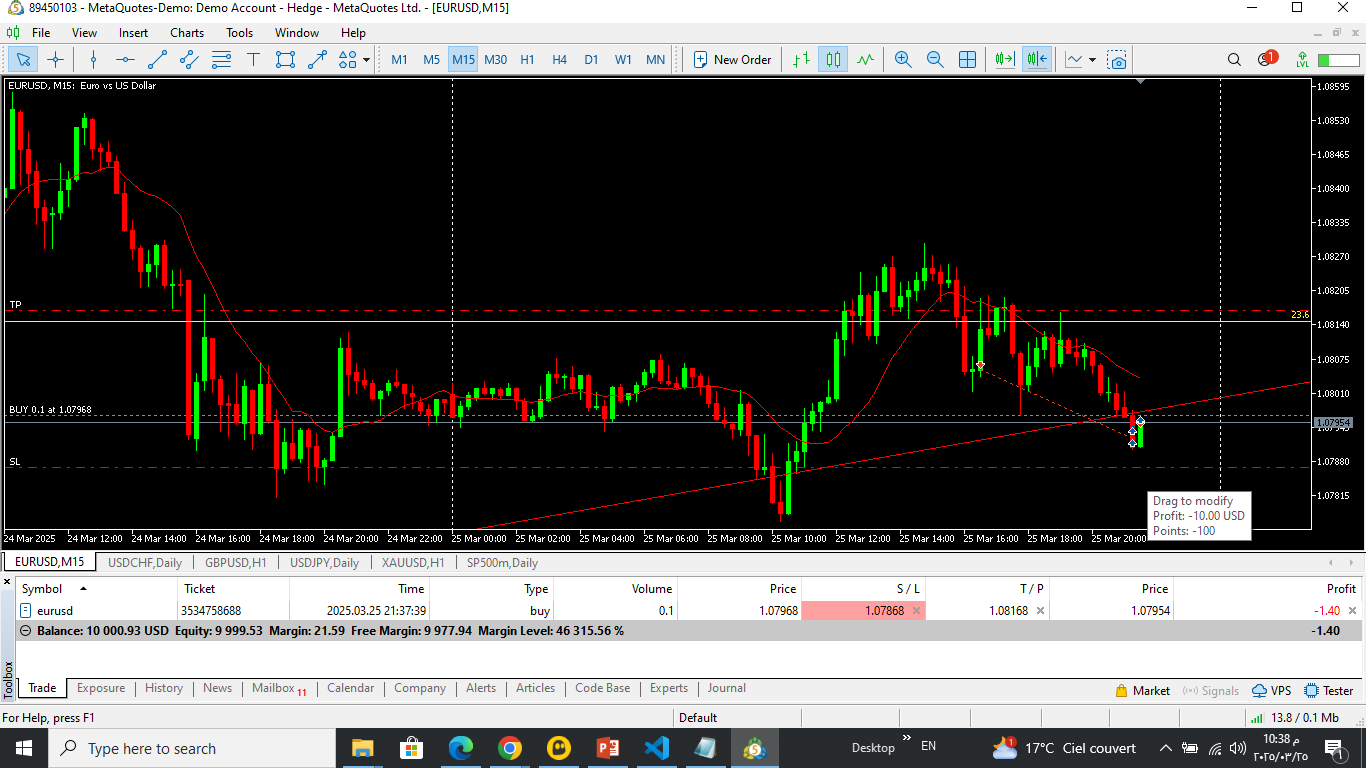

It is important to permet MetaTrader terminal to receive orders from python by allowing algorithmic trading as explaind in the following image

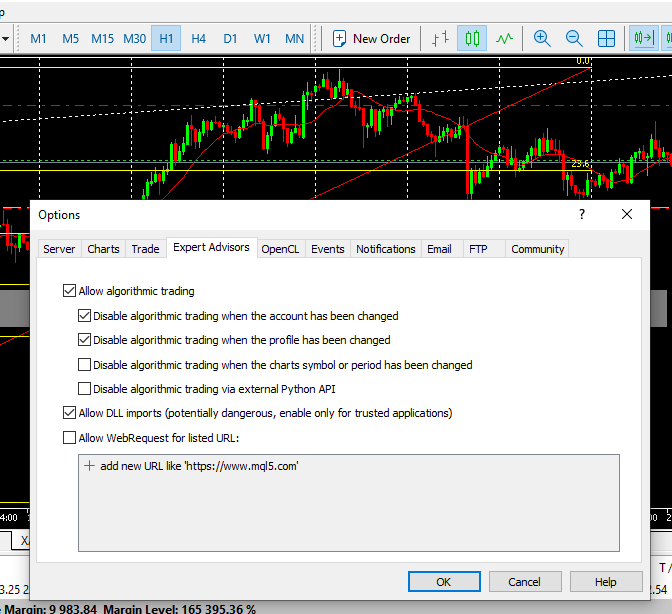

In [28]:
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ", mt5.__author__)
print("MetaTrader5 package version: ", mt5.__version__)

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.4874


In [41]:
now=datetime.now()
now

datetime.datetime(2025, 3, 27, 18, 17, 33, 431184)